## Geotermometro clino/orto-pirosseno

Vedremo qui di mettere in pratica la teoria discussa nelle lezioni di termodinamica (rif. lezione termodinamica_17), con l'esempio di un *ipotetico* geotermometro basato sulla ripartizione di ferro e magnesio tra due pirosseni, di cui uno monoclino e l'altro ortorombico. 

Per chi volesse replicare i dati usati per la calibrazione del geotermometro, questi sono stati *simulati* usando il programma Perplex, con il database termodinamico *hp622ver.dat* per gli end-member, i modelli di soluzione Opx(JH) e Cpx(JH), e per una composizione globale (in moli) pari a: 

CaO 0.4; MgO 1.4; FeO 0.2 e SiO2 2.0.

I dati ottenuti dalla simulazione con Perplex (frazioni molari di Fe nel clinopirosseno, nell'ortopirosseno e la temperatura corrispondente) sono contenuti nel file Excel *geotermometro.xlsx* che deve essere presente nel folder da cui viene lanciato il programma o questo notebook. 

Il notebook funziona sulla base del programma *geotermometro.py* che lanceremo nelle celle successive.

In [1]:
import inspect as ins
%matplotlib inline

In [2]:
%run geotermometro.py

Dopo aver lanciato il programma (cella precedente) devono essere caricati i dati per la calibrazione del geotermometro, usando la funzione read_data, il cui codice è:

In [3]:
print(ins.getsource(read_data))

def read_data(file='geotermometro.xlsx'):
    data=pd.read_excel(file)
    dt.t_list=data['T'].values
    dt.c_list=data['CPX'].values
    dt.o_list=data['OPX'].values
    dt.ll_dat=len(dt.t_list)
    dt.data_flag=True
    print_data()



Dal punto di vista dell'attività di programmazione, l'interesse per questa funzione sta nell'uso delle funzioni della libreria [pandas](https://pandas.pydata.org/) per leggere dataset contenuti in file di vario formato (tra cui Excel) e di manipolarli nel modo opportuno. In questo caso si usa la funzione *read_excel* della libreria *pandas* per caricare il file ed assegnare le variabili t_list (T: temperatura), c_list (CPX: frazione molare del ferro nel clinopirosseno) e o_list (OPX: frazione molare del ferro nell'ortopirosseno) con i dati contenuti nel file. 

I dati caricati devono essere condivisi tra funzioni diverse del programma e, per questo motivo, vengono salvati entro una variabile *dt* che è l'istanza di una semplice classe *data* il cui codice è 

```
class data():
      def __init__(self):
          self.t_list=np.array([])
          self.c_list=np.array([])
          self.o_list=np.array([])
          self.reg=np.array([])
          self.data_flag=False
          self.reg_flag=False
          self.mnr=0.
          self.mxr=0.
          self.ll_dat=0
      def set_reg(self,reg,mnr,mxr):
          self.reg_flag=True
          self.reg=reg
          self.mnr=mnr
          self.mxr=mxr
```

La variabile *dt* è poi creata con l'assegnazione

dt=data()

In questo modo, la lista dei valori di temperatura viene ad esempio conservata nella variabile *dt.t_list*. La classe prevede anche un metodo (*set_reg*) per assegnare i parametri della regressione lineare del rapporto CPX/OPX in funzione della temperatura (che sono usati in varie funzioni del programma)

In [4]:
read_data()


Dati iniziali (sampling factor: 4)

    T    c-Fe   o_Fe   c-Mg   o-Mg    rFe    rMg 
  498.3  0.011  0.160  0.989  0.840  0.070  1.177
  559.3  0.016  0.157  0.984  0.843  0.104  1.167
  620.3  0.022  0.154  0.978  0.846  0.146  1.155
  681.4  0.028  0.151  0.972  0.849  0.184  1.145
  742.4  0.034  0.147  0.966  0.853  0.230  1.133
  803.4  0.039  0.144  0.961  0.856  0.270  1.123
  864.4  0.044  0.141  0.956  0.859  0.313  1.112
  925.4  0.048  0.138  0.952  0.862  0.352  1.104
  986.4  0.053  0.135  0.947  0.865  0.395  1.094
 1047.5  0.057  0.132  0.943  0.868  0.432  1.087
 1108.5  0.062  0.130  0.938  0.870  0.476  1.078
 1169.5  0.065  0.128  0.935  0.872  0.512  1.071


La lista dei dati di calibrazione viene stampata come illustrato nella cella precedente da una funzione *print_data* chiamata da *read_data*, il cui codice è: 

In [5]:
print(ins.getsource(print_data))

def print_data(ns=4):
    
    if not dt.data_flag:
        read_data()
        return
        
    c_mg_list=1-dt.c_list
    o_mg_list=1-dt.o_list
    r_mg=c_mg_list/o_mg_list
    r_fe=dt.c_list/dt.o_list
    
    serie=(dt.t_list.round(1),dt.c_list.round(3),dt.o_list.round(3),c_mg_list.round(3),\
           o_mg_list.round(3),r_fe.round(3),r_mg.round(3))
    pd.set_option('colheader_justify', 'center')
    df=pd.DataFrame(serie, index=['T', 'c-Fe', 'o_Fe', 'c-Mg', 'o-Mg', 'rFe','rMg'])
    df=df.T
    print("\nDati iniziali (sampling factor: %i)\n" % ns)
    df2=df.iloc[0:-1:ns]
    print(df2.to_string(index=False))



La funzione *print_data* sfrutta alcune funzionalità della libreria *pandas* per strutturare velocemente delle tabelle di dati per una chiara visualizzazione. Per esempio, supponiamo di creare una lista di valori di una variabile indipendente *x* e del suo *quadrato* (<i>y=x^2</i>); possiamo costruire una tabella con il codice che segue:  

In [6]:
n_val=5
x_ini=0.
x_fin=10.

# Liste x e y
x_list=np.linspace(x_ini,x_fin,n_val)
y_list=x_list**2

tab=(x_list,y_list)
data=pd.DataFrame(tab, index=['X', 'Y'])

print(data)

    0     1     2     3      4  
X  0.0  2.50   5.0   7.50   10.0
Y  0.0  6.25  25.0  56.25  100.0


Volendo scrivere la tabella in due colonne, *trasponiamo* il *DataFrame* *data* scrivendo semplicemente:

In [7]:
data=data.T

print(data)

     X      Y  
0   0.0    0.00
1   2.5    6.25
2   5.0   25.00
3   7.5   56.25
4  10.0  100.00


Per eliminare i *numeri di linea* un modo semplice è:

In [8]:
print(data.to_string(index=False))

   X      Y  
  0.0    0.00
  2.5    6.25
  5.0   25.00
  7.5   56.25
 10.0  100.00


che sfrutta il metodo *to_string* per convertire i dati numerici della tabella in righe di tipo *carattere*, rimuovendo l'indice (*index=False* che corrisponde al numero di linea). Esistono poi molti attributi e metodi scritti per i DataFrame di *pandas* che consentono di operare sui dati. Per esempio i due seguenti: 

In [9]:
data['Y'].values  # accede ai dati della colonna "Y"

array([  0.  ,   6.25,  25.  ,  56.25, 100.  ])

In [10]:
data['X'].mean()  # metodo per calcolare la media dei dati di colonna 'X'

5.0

Tornando al geotermometro, la calibrazione viene fatta dalla funzione *calibrazione*: questa calcola il rapporto (*ratio*) tra le frazioni molari del ferro nel clinopirosseno e nell'ortopirosseno per ogni valore di temperatura (*dt.t_list*) e poi fa un fit lineare di *T* in funzione di *ratio*: <i>T=m\*ratio + q</i>. La funzione *polyfit* della libreria *Numpy* esegue il fit;  i risultati (*m* e *q*) vengono passati alla variabile *reg* che viene poi salvata nella variabile *dt* (istanza della classe *data*), usando il metodo *set_reg* (in modo che le altre funzioni possano accedervi; l'uso di questa tecnica evita il ricorso alle dichiarazioni *global* di variabili create all'interno di funzioni e poi utilizzate all'esterno di esse; come già accennato in altri notebook, l'uso di dichiarative *global* è sconsigliato). date un'occhiata alla funzione *calibrazione*:

In [11]:
print(ins.getsource(calibrazione))

def calibrazione():
    
    if not dt.data_flag:
       read_data()
    
    # Rapporti Cpx/Opx
    ratio = dt.c_list/dt.o_list

    mnr=min(ratio)
    mxr=max(ratio)
    
    # Fit di grado 1 t(ratio) e plot del fit
    reg=np.polyfit(ratio, dt.t_list, 1)
    r_line=np.linspace(min(ratio),max(ratio),50)
    t_line=np.polyval(reg,r_line)
    
    dt.set_reg(reg,mnr,mxr)
    
    plt.figure()
    plt.plot(ratio,dt.t_list,"k*",markersize=5,label="Dati effettivi")
    plt.plot(r_line,t_line,"r-",label="Fit")
    plt.xlabel("clino/orto ratio")
    plt.ylabel("T (K)")
    plt.title("Curva di calibrazione")
    plt.legend(frameon=False)
    plt.show()



Oltre che fare il fit, la funzione si preoccupa di mostrare un grafico con i dati originali e la retta di regressione. Lanciamola:

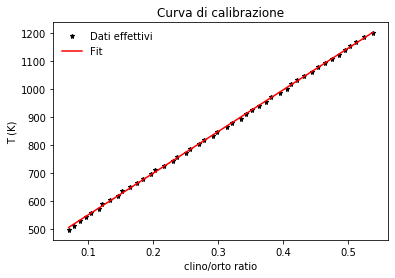

In [12]:
calibrazione()

Come detto nella lezione *termodinamica_17*, con riferimento alla reazione di scambio:

$${\rm Mg}^c + {\rm Fe}^o \leftrightarrow {\rm Mg}^o + {\rm Fe}^c$$

(il simbolo $A^\alpha$ indica la specie chimica $A$ nella fase $\alpha$; $c$ sta per clinopirosseno e $o$ sta per ortopirosseno) possiamo scrivere la *costante di equilibrio* (*costante* a temperatura e pressione costante) come

$$K = \frac{x_{\rm Mg}^{o} x_{\rm Fe}^{c}}{x_{\rm Mg}^{c} x_{\rm Fe}^{o}}=
\frac{x_{\rm Fe}^{c}/x_{\rm Fe}^{o}}{x_{\rm Mg}^{c}/x_{\rm Mg}^{o}}$$

Come visto nelle lezioni, esiste una relazione tra $K$ e la temperatura:

$$\log K= -\frac{\Delta\mu^0}{RT}$$

dove $\Delta\mu^0$ è la variazione di energia libera molare associata alla reazione medesima e dipende dalle energie libere molari dei termini puri alla temperatura e pressione determinata. Essendo una variazione di energia libera a *P* e *T* costanti, sappiamo che questa può essere scritta come:

$$\Delta\mu^0 = \Delta h^0 - T\Delta s^0$$

e quindi:

<br>

$$\log K= -\frac{\Delta\mu^0}{RT} = -\frac{\Delta h^0}{R}\frac{1}{T}+\frac{\Delta s^0}{R}$$

<br>

Facendo un fit *lineare* di $\log K$ in funzione di $1/T$ otteniamo allora l'entalpia della reazione di scambio (*coefficiente angolare* $m=-\Delta h^0/R$) e l'entropia (*intercetta* $q=\Delta s^0/R$). La dipendenza di $\log K$ da $1/T$ è lineare ammesso che l'entalpia e l'entropia di reazione non varino apprezzabilmente con la temperatura.

Per chi sia interessato, ecco il codice che calcola l'entalpia e l'entropia della reazione di scambio a partire dai dati usati per la calibrazione del geotermometro (la funzione è relativamente *complicata* da istruzioni che eseguono un sampling conveniente dei dati di temperatura, essenzialmente per motivi *grafici*; sorvoliamo su questi aspetti): 

In [13]:
print(ins.getsource(log_ratio))

def log_ratio():
    
    if not dt.reg_flag:
        calibrazione()
    
    # c_list e' la frazione molare del ferro nella fase monoclina
    # o_list e' la frazione del ferro nella fase ortorombica
    # c_mg_list e' la frazione di Mg nel monoclino
    # o_mg_list e' la frazione di Mg nell'ortorombico
    c_mg_list=1-dt.c_list
    o_mg_list=1-dt.o_list
    
    # rapporti delle concentrazioni di Mg e Fe tra le due fasi
    r_mg=c_mg_list/o_mg_list
    r_fe=dt.c_list/dt.o_list
    
    # logaritmo del rapporto
    log_r=np.log(r_mg/r_fe)
    
    # reciproco della temperatura
    rt_list=1./dt.t_list
    
    # resampling della lista rt_list 
    rt_min=np.min(rt_list)
    rt_max=np.max(rt_list)
    rt_samp=np.linspace(rt_min,rt_max,20)   
    r_samp=np.interp(rt_samp,rt_list,log_r,period=-1)
    
    reg=np.polyfit(rt_list,log_r,1)
    m=reg[0]
    q=reg[1]
    
    DH=-1*R*m
    DS=q*R
    
    print("Delta_H di reazione %9.2f J/mole" % DH)
    print("Delta_S di reazione %9.2f J/K 

Ed eccone il semplice uso:

Delta_H di reazione -14901.91 J/mole
Delta_S di reazione     -6.64 J/K mole


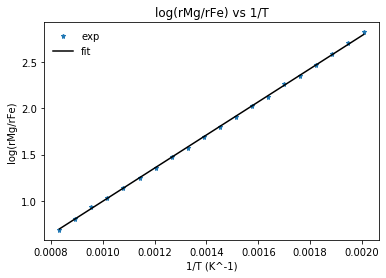

In [14]:
log_ratio()

Siamo adesso pronti a utilizzare il geotermometro su ipotetici dati: abbiamo per esempio misurato la frazione molare del ferro in un clinopirosseno e in un ortopirosseno che sono a contatto in un dato campione di roccia, e vogliamo avere una stima della temperatura a cui questa si è equilibrata. Usiamo allo scopo la funzione temperatura, passandogli come argomenti i valori delle frazioni molari misurate. 

Il codice della funzione è molto semplice: usa i parametri della retta di regressione ottimizzati dalla funzione *calibrazione* e calcola direttamente la temperatura note le frazioni molari. Esegue anche un plot per vedere come si *colloca* il nostro dato $\left(x_{\rm Fe}^{c}, x_{\rm Fe}^{o}\right)$ rispetto ai dati usati per la calibrazione:

In [15]:
print(ins.getsource(temperatura))

def temperatura(c_val,o_val,flag=True):
    """
    Calcola la temperatura di equilibrio del sistema
    in base al rapporto delle concentrazioni del
    ferro in Cpx e Opx
    
    Input: 
        c_val: frazione molare del ferro in cpx
        o_val: frazione molare del ferro in opx
    """
    
    if not dt.reg_flag:
       calibrazione()
    
    r_val=c_val/o_val
    
    # if r_val > dt.mxr or r_val < dt.mnr:
    #     print("Rapporto clino/orto fuori dal range")
    #     return
    
    t_val=np.polyval(dt.reg,r_val)

    if flag:         
        print("Temperatura stimata: %4.2f K" % t_val)
        
        plt.figure()
        plt.plot(dt.c_list,dt.o_list,label="Dati di calibrazione")
        plt.scatter(c_val,o_val,s=50,c='red',marker='*',label="Dato attuale")
        plt.title("c-Fe vs o-Fe")
        plt.xlabel("c-Fe")
        plt.ylabel("o-Fe")
        plt.legend(frameon=False)
        plt.show()
    else:
        return t_val



Usiamo la funzione:

Temperatura stimata: 958.14 K


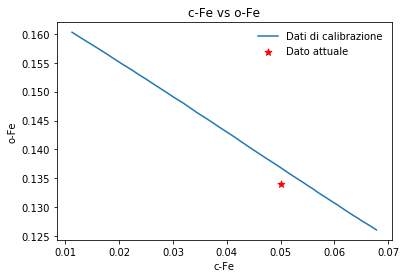

In [16]:
temperatura(0.050,0.134)

Un'idea dell'errore associato a questa stima la abbiamo guardando all'errore medio del fit dei dati di calibrazione, calcolato con la funzione *error*:

In [17]:
print(ins.getsource(error))

def error():
    
    if not dt.reg_flag:
        calibrazione()
        
    index=0
    rl=np.array([])
    et=np.array([])
    for ir in dt.c_list:
        c=dt.c_list[index]
        o=dt.o_list[index]
        t=temperatura(c,o,flag=False)
        it=dt.t_list[index]
        irl=c/o
        rl=np.append(rl,irl)
        iet=(it-t)**2
        et=np.append(et,iet)
        index=index+1

    ets=np.sqrt(et)
    plt.figure()
    plt.plot(dt.t_list,ets,"k-",label="|T_exp - T_fit|")
    plt.xlabel("T (K)")
    plt.ylabel("Errore")
    plt.title("Errore sulle stime di temperatura")
    plt.legend(frameon=False)
    
    et_sum=np.sum(et)
    err=np.sqrt(et_sum/(dt.ll_dat-1))
    print("\nErrore medio sulla stima di temperatura: %4.1f K" %\
          err)
    mxe=max(ets)
    print("Scarto massimo: %4.1f K" % mxe)




Errore medio sulla stima di temperatura:  3.6 K
Scarto massimo:  9.0 K


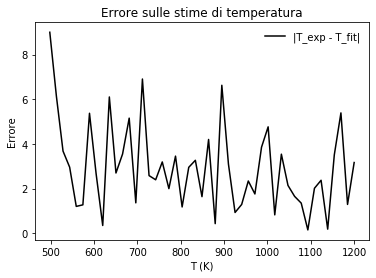

In [18]:
error()

Possiamo quindi aspettarci un errore di circa 4 K, dovuto al fit dei dati di calibrazione. Poi può esserci un errore legato all'incertezza delle nostre misure sul campione specifico. Per questo è improbabile (e sconsigliabile) avere *una sola* misura delle concentrazioni della nostra specie chimica nelle due fasi a contatto... E' normale fare misurazioni ripetute in punti adiacenti del campione per poi mediare su tutte le stime di temperatura ottenuta. Supponiamo di aver fatto più misure e di averle riportate in due colonne di un file Excel *user_data.xlsx* (presente nel folder di questo notebook); usiamo la funzione *temp_serie* per stimare le corrispondenti temperature e mediare i risultati. 

Il codice della funzione è: 

In [19]:
print(ins.getsource(temp_serie))

def temp_serie(file='user_data.xlsx'):
    data=pd.read_excel(file)
    c_user=data['CPX'].values
    o_user=data['OPX'].values
    
    t_user=np.array([])
    index=0
    for ic in c_user:
        c_val=c_user[index]
        o_val=o_user[index]
        t_val=temperatura(c_val,o_val,flag=False)
        t_user=np.append(t_user,t_val)
        index=index+1
     
    plt.figure()
    plt.plot(dt.c_list,dt.o_list,label="Dati di calibrazione")
    plt.scatter(c_user,o_user,s=50,c='red',marker='*',label="Dati attuali")
    plt.title("c-Fe vs o-Fe")
    plt.xlabel("c-Fe")
    plt.ylabel("o-Fe")
    plt.legend(frameon=False)
    plt.show()

    serie=(c_user.round(4),o_user.round(4),t_user.round(2))
    pd.set_option('colheader_justify', 'center')
    df=pd.DataFrame(serie, index=['c-Fe', 'o_Fe', 'T'])
    df=df.T
    print(df.to_string(index=False))  
    
    media=df['T'].mean()
    std=df['T'].std()
    print("\nTemperatura media: %6.2f (std: %3.0f)" % (media, std))



Anche questa funzione usa le funzioni della libreria *pandas* per leggere i dati del nostro file e per costruire una tabella che riassuma dati e risultati: 

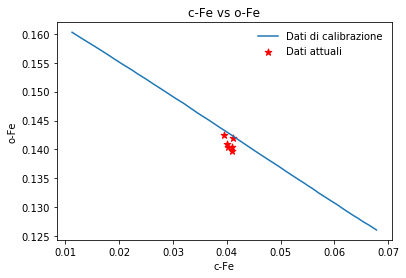

  c-Fe    o_Fe      T  
 0.0400  0.1410  825.09
 0.0412  0.1420  834.69
 0.0395  0.1425  815.43
 0.0402  0.1405  828.71
 0.0409  0.1404  836.43
 0.0410  0.1398  839.35

Temperatura media: 829.95 (std:   9)


In [20]:
temp_serie()

Con quei dati abbiamo una stima della temperatura intorno agli 830K, con un'incertezza di 9K dovuta alla dispersione dei dati medesimi. Questa incertezza va combinata con quella relativa al fit di calibrazione (4K)...

In [21]:
np.sqrt(9**2+4**2).round(1)

9.8

Quindi siamo intorno ai 10K di possibile errore sulla stima della temperatura. Ma c'è dell'altro... I nostri dati (asterischi in rosso nel grafico sopra) indicano che forse il nostro sistema non ha raggiunto il pieno *equilibrio*, oppure che la calibrazione è stata fatta su un campione di roccia chimicamente troppo diverso da quello sul quale stiamo lavorando noi... In questo genere di lavori, mai *fidarsi* troppo di dati che provengano da un'unica tecnica: li si può accettare *provvisoriamente* in mancanza di altre evidenze e supporti incrociati, ma bisogna sempre essere pronti a una loro revisione. 

### Lavoriamo di fantasia...

Le temperature per le quali abbiamo fatto la calibrazione del geormometro sono conservate nella lista dt.t_list:

In [22]:
dt.t_list

array([ 498.305,  513.559,  528.814,  544.068,  559.322,  574.576,
        589.831,  605.085,  620.339,  635.593,  650.847,  666.102,
        681.356,  696.61 ,  711.864,  727.119,  742.373,  757.627,
        772.881,  788.136,  803.39 ,  818.644,  833.898,  849.153,
        864.407,  879.661,  894.915,  910.169,  925.424,  940.678,
        955.932,  971.186,  986.441, 1001.69 , 1016.95 , 1032.2  ,
       1047.46 , 1062.71 , 1077.97 , 1093.22 , 1108.47 , 1123.73 ,
       1138.98 , 1154.24 , 1169.49 , 1184.75 , 1200.   ])

Selezioniamo le ultime 10, e inseriamole nella lista *new_t* (la sintassi è un po' strana... ma sorvoliamo qui sugli aspetti informatici), supponendo di aver fatto misure per la calibrazione del geotermometro a partire da circa 1060K fino a 1200K e non da 500K come era per i dati originali.

In [23]:
new_t=dt.t_list[-10::1]
print(new_t)

[1062.71 1077.97 1093.22 1108.47 1123.73 1138.98 1154.24 1169.49 1184.75
 1200.  ]


Facciamo lo stesso con i dati di frazione molare, con i quali ci calcoliamo la costante *K*

In [24]:
new_c=dt.c_list[-10::1]  # frazioni molari del ferro nel clinopirosseno
new_o=dt.o_list[-10::1]  # frazioni molari del ferro nell'ortopirosseno
new_mg_c=1-new_c         # Mg nel clinopirosseno 
new_mg_o=1-new_o         # Mg nell'ortopirosseno

K=(new_c/new_o)/(new_mg_c/new_mg_o) # costante di equilibrio

print(K.round(3))   

[0.41  0.418 0.429 0.441 0.452 0.46  0.468 0.478 0.491 0.504]


Facciamo un plot di della costante di equilibrio in funzione della temperatura:

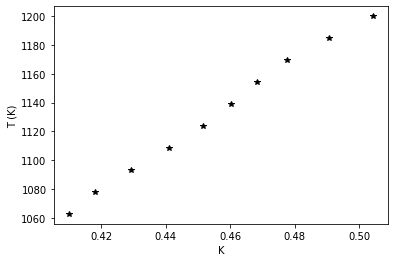

In [25]:
plt.figure()
plt.plot(K,new_t,"k*")
plt.ylabel("T (K)")
plt.xlabel("K")
plt.show()

I punti ottenuti appaiono abbastanza ben allineati su una retta... Quindi, non conoscendo nulla di termodinamica, perchè non farci una bella regressione lineare?

Pronti!

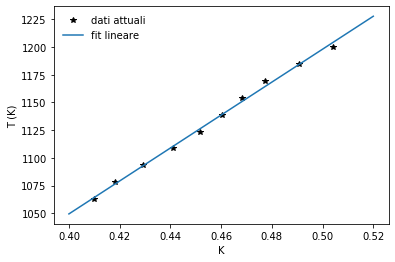

In [26]:
lin=np.polyfit(K,new_t,1)   # regressione lineare sui dati T(K)

k2=np.array([0.40,0.52])    # valori di K e T dal fit, da usarsi nella grafica
t2=np.polyval(lin,k2)

# grafica per il controllo del fit
plt.figure()
plt.plot(K,new_t,"k*",label="dati attuali")
plt.plot(k2,t2,label="fit lineare")
plt.ylabel("T (K)")
plt.xlabel("K")
plt.legend(frameon=False)
plt.show()

Bene... adesso siamo *pronti* per l'estrapolazione alle temperature più basse, usando il fit lineare che ci siamo costruiti. Dal laboratorio accanto, il nostro collega ci passa i risultati delle sue misure su un campione *incognito*: le frazioni molari del ferro nel clinopirosseno e nell'ortopirosseno sono rispettivamente 0.010 e 0.162, e ci chiede una stima della temperatura di equilibrio:

Stima della temperatura: 532.29 (K)



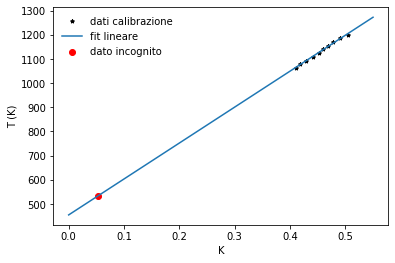

In [30]:
cfe=0.010   # dati iniziali
ofe=0.162

cmg=1-cfe
omg=1-ofe

rmg=cmg/omg
rfe=cfe/ofe

k_sample=rfe/rmg

T_est=np.polyval(lin,k_sample)   # stima della temperatura sulla base del K misurato 
                                 # (k_sample) e dei parametri della retta di regressione 
                                 # ottimizzati precedentemente (lin)
                                 
print("Stima della temperatura: %5.2f (K)\n" % T_est)

k2=np.array([0.0, 0.55])      # calcolo T per due i estremi (min e max di K) 
t2=np.polyval(lin,k2)         #   sulla base del fit lineare
plt.figure()
plt.plot(K,new_t,"k*",markersize=4,label="dati calibrazione")
plt.plot(k2,t2,label="fit lineare")
plt.scatter(k_sample,T_est,c='red', label="dato incognito")
plt.ylabel("T (K)")
plt.xlabel("K")
plt.legend(frameon=False)
plt.show()

Con il nostro fit lineare, del tipo:

$$T=a+bK$$

dove $a$ e $b$ sono le due variabili di regressione ottimizzate sulla base del nostro (limitato) set di dati, abbiamo stimato una temperatura di equilibrio di circa 532K. Adesso però, qualcuno che conosce la termodinamica meglio di noi, ci dice che quel fit lineare che secondo noi, sulla base del grafico, legherebbe $T$ e $K$, non ha alcun fondamento nonostante le *apparenze*. Quello che dovremmo invece fare, volendo ancora usare un fit lineare, è legare il logaritmo di $K$ al reciproco della temperatura:

$$\frac{1}{T} = a + b\log K$$

con $a$ e $b$ da ottimizzarsi sulla base dei nostri dati... Un po' scettici circa questo avvertimento, andiamo a fare questo fit e poi utilizziamolo per rifare la nostra stima della temperatura:

In [31]:
log_new_k=np.log(K)    # logaritmo di K
rt_new=1./new_t        # reciproco della temperatura

termo_fit=np.polyfit(log_new_k,rt_new,1)   # fit di 1/T in funzione di log(K)

log_k_sample=np.log(k_sample)                       
rT_est_termo=np.polyval(termo_fit, log_k_sample)   # stima del reciproco della T dato il log (K_sample)
                                                   # sulla base del fit appena fatto (i parametri a e b 
                                                   # del fit sono nella variabile termo_fit)
        
T_est_termo=1/rT_est_termo                         # passiamo dal "reciproco della T" a T

print("Temperatura stimata: %5.2f\n" % T_est_termo)

Temperatura stimata: 492.38



La differenza tra le due stime di temperatura è circa 40K. Non è una grandissima differenza, ma è pur sempre ben maggiore dell'errore che ci aspettiamo sulla base di questo tipo di misura, come abbiamo visto nella prima parte del notebook. 

Se avessimo avuto tutti i dati (anche quelli di più bassa temperatura), avremmo ottenuto una stima molto vicina a quella che abbiamo dato usando il fit corretto:

Temperatura stimata: 494.95 K


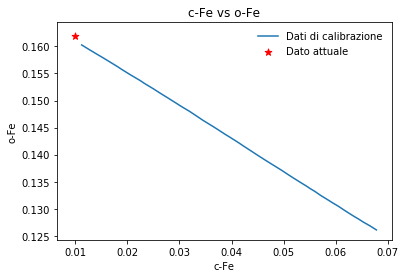

In [29]:
temperatura(0.010,0.162)

Morale: <b>studiare termodinamica!</b>